# **Sentiment Analysis using DeepLearning Algorithms**

By 024 Furkan Mistry

## **About Dataset**

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.
For more dataset information, please go through the following link,
http://ai.stanford.edu/~amaas/data/sentiment/

In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('IMDB Dataset.csv', sep=',')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

<ipython-input-3-0554edc9e970>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


## **Data Visualization**

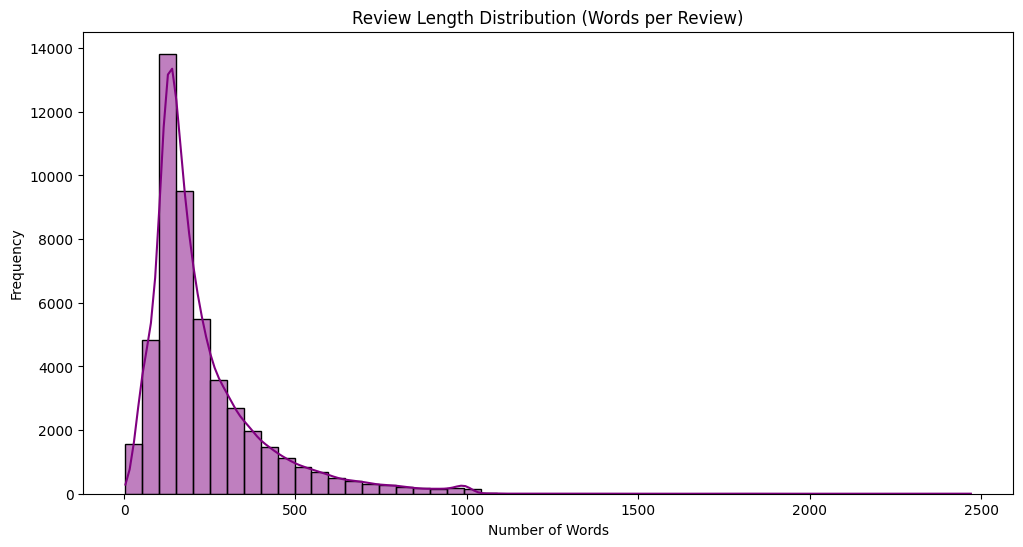

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the length of reviews (number of words per review)
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12,6))
sns.histplot(df['review_length'], bins=50, kde=True, color='purple')
plt.title('Review Length Distribution (Words per Review)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


The distribution shows most reviews are between 0-300 words, with fewer long reviews. This skewness suggests using padding/truncation to handle varying lengths efficiently. Short reviews might lack sufficient context for sentiment, so additional features or context could help. Long reviews are rare and may introduce noise, so consider truncating beyond a certain length (e.g., 300 words). Stopword removal could reduce noise in shorter reviews.

**Check target class is balance or not**

In [6]:
# Sentiment Classes Stats
print(df['sentiment'].value_counts())

sentiment
1    25000
0    25000
Name: count, dtype: int64


<ipython-input-7-f608ce1d5c72>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


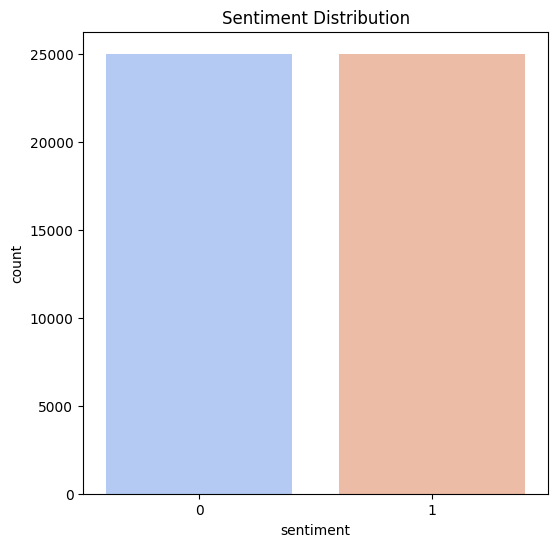

In [7]:
# Visualize the sentiment distribution
plt.figure(figsize=(6,6))
sns.countplot(x='sentiment', data=df, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-8-0c586c19fd3d>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)

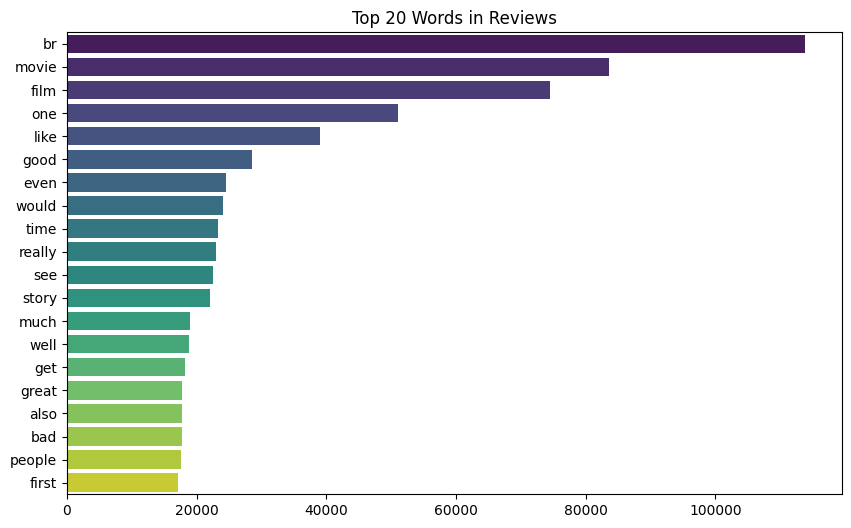

In [8]:
from collections import Counter
from nltk.corpus import stopwords
import string
import nltk
nltk.download('stopwords')
english_stopwords = stopwords.words("english")
# Function to clean the reviews
def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    return text

df['clean_review'] = df['review'].apply(clean_text)

# Create a counter for word frequencies
stop_words = set(stopwords.words('english'))
word_counter = Counter()

for review in df['clean_review']:
    words = review.split()
    for word in words:
        if word not in stop_words:
            word_counter[word] += 1

# Plot the top 20 most frequent words
top_words = word_counter.most_common(20)
words, counts = zip(*top_words)
plt.figure(figsize=(10,6))
sns.barplot(x=counts, y=words, palette='viridis')
plt.title('Top 20 Words in Reviews')
plt.show()


To enhance your model using insights from frequent words, start by removing common stopwords identified in the top words to reduce noise. Next, prioritize domain-specific frequent words to improve word embeddings and enhance context understanding.

# **PREPROCESSING**

**TRAIN, TEST, SPLIT**

In [9]:
from sklearn.model_selection import train_test_split

# 80-20 train-test split - Pareto Principle
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Further 80-20 split on the training data to get validation set
split_perc = 0.8
split_at = int(len(train_df) * split_perc)
train_sentences = train_df['review'][:split_at]
train_labels = train_df['sentiment'][:split_at]

validation_sentences = train_df['review'][split_at:]
validation_labels = train_df['sentiment'][split_at:]

# Test dataset
test_sentences = test_df['review']
test_labels = test_df['sentiment']


In [10]:
import re
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

# cleaning sentences
def clean_sentences(sentences):
    out = []
    for sentence in sentences:
        # Lowering
        sentence = sentence.lower()
        # Removing html
        sentence = BeautifulSoup(sentence,).get_text()
        # Removing Urls
        sentence = re.sub("https?:\/\/[\w+.\/]+", " ", sentence)
        # Remove non-letters
        sentence = re.sub("[^a-zA-Z]", " ", sentence)
        # Removing stop words
        for word in english_stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ").replace("  ", " ")
        out.append(sentence)
    return out

train_sentences = clean_sentences(train_sentences)
validation_sentences = clean_sentences(validation_sentences)

<ipython-input-10-c30df76e9483>:13: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentence = BeautifulSoup(sentence,).get_text()


**Lemitization**

In [11]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize_sentence(sentence):
    return ' '.join([lemmatizer.lemmatize(word) for word in sentence.split()])

def clean_and_lemmatize(sentences):
    out = []
    for sentence in sentences:
        # Clean sentence as before
        sentence = clean_sentences([sentence])[0]
        # Lemmatization
        sentence = lemmatize_sentence(sentence)
        out.append(sentence)
    return out

train_sentences = clean_and_lemmatize(train_sentences)
validation_sentences = clean_and_lemmatize(validation_sentences)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



In this project, lemmatization is preferred over stemming due to its ability to produce meaningful base forms of words, which enhances the understanding of context. Unlike stemming, which simply truncates words to their root form and can result in non-existent words, lemmatization uses a dictionary-based approach to ensure that the derived words are valid and meaningful.

 For example, lemmatization converts "better" to "good" and "running" to "run," maintaining semantic accuracy. Additionally, lemmatization considers the word's context and part of speech, resulting in more relevant transformations.

In [12]:
print(train_sentences[:1])

['that kept asking many fight screaming match swearing general mayhem permeate minute comparison also stand think one dimensional character little depth virtually impossible care happens badly written cypher director hang multicultural belief topic done much better drama tv cinema must confess really one spotting bad performance film must said nichola burley heroine slutty best friend wasim zakir nasty bullying brother absolutely terrible know acting school graduated apply full refund post haste samina awan lead role manages impress cast called british talent probably never hear least hope next time hire different scout another intriguing thought hideously fashionable soundtrack featuring like snow patrol ian brown keane bit music fan familiar artist output recognise track movie apart omnipresent run b side anyone get many many musical montage telegraph suppose feel accompanied startlingly original image couple kissing swollen lake canoodling doorway problem none song convey mood effic

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# get vocabulary with Tokenizer
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
print("TOTAL WORDS:", len(word_index))

TOTAL WORDS: 76159


In [14]:
# over 5000 word index we have few examples
vocab_size = 5000
# over 500 word count we have few sentences
sequence_length = 500

1) vocab_size = 5000: Limits the vocabulary size to 5000 words. This is useful to prevent the model from getting too large and to remove rare words that may not contribute significantly to the model's performance.

2) sequence_length = 500: Sets the maximum length of sequences (sentences) to 500 tokens. Sentences shorter than this length will be padded, and longer sentences will be truncated. This helps ensure that all sequences have a fixed length, which is a requirement for many deep learning models.

In [15]:
# sequencing and padding
# sequences of numbers from sentences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)



# padding
train_padded = pad_sequences(train_sequences, padding='post', maxlen=sequence_length)
validation_padded = pad_sequences(validation_sequences, padding='post', maxlen=sequence_length)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=sequence_length)
print(sequence_length)

500


1. Text Tokenization and Sequencing: Converts words into integer sequences.

2. Padding: Ensures uniform sequence length by padding or truncating sequences.

3. GloVe Embedding: Maps each integer-encoded word into a GloVe vector, providing a dense representation that encodes semantic meaning.

In [16]:
import tensorflow as tf
import tensorflow_hub as hub

In [17]:
# for performances
AUTOTUNE = tf.data.AUTOTUNE
# converting to TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_padded, train_labels.to_numpy())).cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = tf.data.Dataset.from_tensor_slices((validation_padded, validation_labels.to_numpy())).cache().prefetch(buffer_size=AUTOTUNE)
# Converting test data to TensorFlow Dataset
test_dataset = tf.data.Dataset.from_tensor_slices((test_padded, test_labels.to_numpy())).cache().prefetch(buffer_size=AUTOTUNE)



In [18]:
# how to decode an encoded sequence of numbers
reversed_word_index = { v: k for k, v in word_index.items() }
def decode_review(sequence):
    return ' '.join([reversed_word_index.get(i, '?') for i in sequence if i != 0])

# verify the decoding of an example sentence
print("Original Sentence: ", train_sentences[0])
print("Encoded Sequence of numbers: ", train_padded[0])
print("Decoded Sequence: ", decode_review(train_padded[0]))

Original Sentence:  that kept asking many fight screaming match swearing general mayhem permeate minute comparison also stand think one dimensional character little depth virtually impossible care happens badly written cypher director hang multicultural belief topic done much better drama tv cinema must confess really one spotting bad performance film must said nichola burley heroine slutty best friend wasim zakir nasty bullying brother absolutely terrible know acting school graduated apply full refund post haste samina awan lead role manages impress cast called british talent probably never hear least hope next time hire different scout another intriguing thought hideously fashionable soundtrack featuring like snow patrol ian brown keane bit music fan familiar artist output recognise track movie apart omnipresent run b side anyone get many many musical montage telegraph suppose feel accompanied startlingly original image couple kissing swollen lake canoodling doorway problem none song

In [19]:
!pip install gensim

from gensim.downloader import load as gensim_load
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, Dropout, GlobalAveragePooling1D, LayerNormalization
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load GloVe embeddings (25d)
glove_vectors = gensim_load('glove-twitter-25')  # You can also choose 'glove-twitter-50', 'glove-twitter-100', etc.

embedding_dim = 25  # Match this to the dimension of the GloVe vectors you're using

In [20]:
embeddings_matrix = np.zeros((vocab_size + 1, embedding_dim))
for word, i in word_index.items():
    if i < vocab_size and word in glove_vectors:
        embeddings_matrix[i] = glove_vectors[word]

In [23]:
print(embedding_dim)

25


# **Model Building**

## **Bidirectional LSTM Sentiment Analysis Model with Pretrained Embeddings and TensorFlow Callbacks**

In [29]:
# Our model definition
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, weights=[embeddings_matrix], trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam() ,
              metrics=['accuracy'])

In [30]:
# some smart callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                        patience=5, mode='min',
                        verbose=1)
checkpoint_filepath = './model-best.keras'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                      monitor='val_accuracy',
                                                      mode='max',
                                                      save_best_only=True)



In [31]:
# training
epochs_num=15
history = model.fit(train_dataset.shuffle(10000).batch(256),
                    epochs=epochs_num,
                    validation_data=validation_dataset.batch(256),
                    callbacks=[reduce_lr, model_checkpoint]
                   )

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:681: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.5266 - loss: 0.6852 - val_accuracy: 0.7688 - val_loss: 0.4965 - learning_rate: 0.0010
Epoch 2/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 140ms/step - accuracy: 0.7920 - loss: 0.4706 - val_accuracy: 0.8040 - val_loss: 0.4705 - learning_rate: 0.0010
Epoch 3/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.8378 - loss: 0.3911 - val_accuracy: 0.8299 - val_loss: 0.3763 - learning_rate: 0.0010
Epoch 4/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.8753 - loss: 0.3172 - val_accuracy: 0.8629 - val_loss: 0.3367 - learning_rate: 0.0010
Epoch 5/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 106ms/step - accuracy: 0.8892 - loss: 0.2899 - val_accuracy: 0.8650 - val_loss: 0.3341 - learning_rate: 0.0010
Epoch 6/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.8978 - loss: 0.2688 - val_accuracy: 0.8706 - val_loss: 0.3258 - learning_rate: 0.0010
Epoch 7/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9059 - loss: 0.25

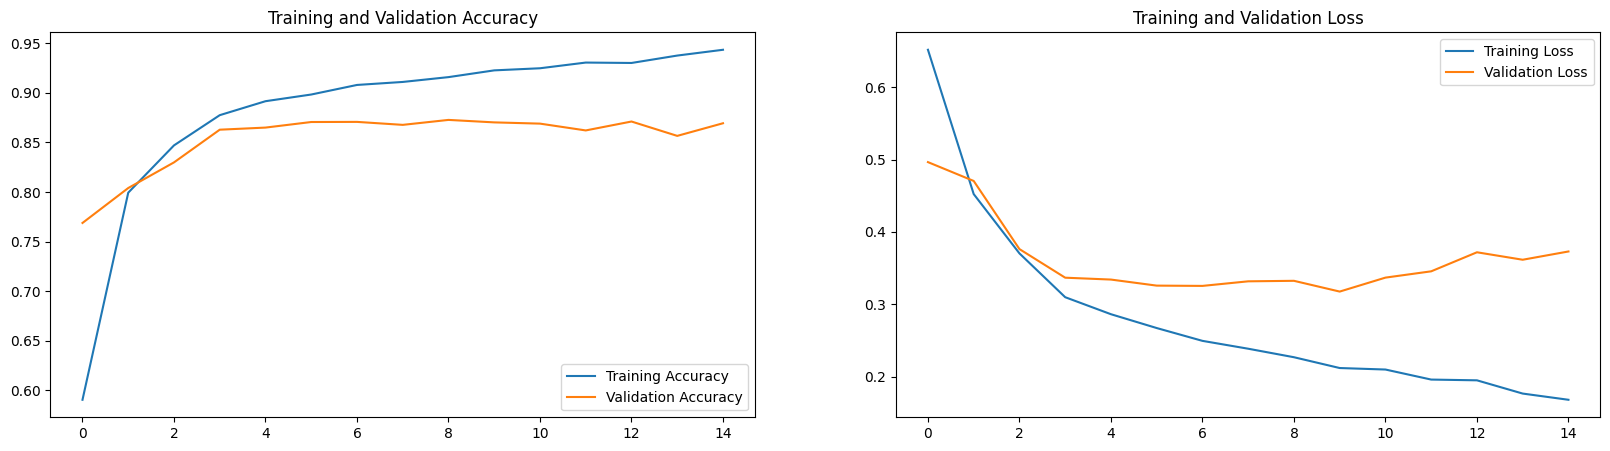

In [32]:
# show loss and accuracy
def show_loss_accuracy(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(len(acc))

  plt.figure(figsize=(20, 5))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')
  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()
show_loss_accuracy(history)

In [33]:
# Load the best model saved during training
model.load_weights(checkpoint_filepath)

# Evaluate the model on the training dataset
train_loss, train_accuracy = model.evaluate(train_dataset.batch(512))
print(f'Train Accuracy: {train_accuracy:.4f}')

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset.batch(512))
print(f'Test Accuracy: {test_accuracy:.4f}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9318 - loss: 0.1936
Train Accuracy: 0.9327
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8609 - loss: 0.3330
Test Accuracy: 0.8577


In [34]:
import numpy as np

def predict_sentiment(review, tokenizer, model, sequence_length):
    # Clean the input review
    review = clean_sentences([review])[0]

    # Tokenize and pad the review
    sequence = tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(sequence, padding='post', maxlen=sequence_length)

    # Predict sentiment
    prediction = model.predict(padded_sequence)

    # Return 0 or 1 based on the prediction
    return (prediction > 0.5).astype(int)[0][0]

# Example usage
sample_review = "With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally starts is only on for 20 minutes or so excluding the Smooth Criminal sequence and Joe Pesci is convincing as a psychopathic all powerful drug lord. Why he wants MJ dead so bad is beyond me. Because MJ overheard his plans? Nah, Joe Pesci's character ranted that he wanted people to know it is he who is supplying drugs etc so i dunno, maybe he just hates MJ's music.<br /><br />Lots of cool things in this like MJ turning into a car and a robot and the whole Speed Demon sequence. Also, the director must have had the patience of a saint when it came to filming the kiddy Bad sequence as usually directors hate working with one kid let alone a whole bunch of them performing a complex dance scene.<br /><br />Bottom line, this movie is for people who like MJ on one level or another (which i think is most people). If not, then stay away. It does try and give off a wholesome message and ironically MJ's bestest buddy in this movie is a girl! Michael Jackson is truly one of the most talented people ever to grace this planet but is he guilty? Well, with all the attention i've gave this subject....hmmm well i don't know because people can be different behind closed doors, i know this for a fact. He is either an extremely nice but stupid guy or one of the most sickest liars. I hope he is not the latter."
sentiment = predict_sentiment(sample_review, tokenizer, model, sequence_length)
print(f"The predicted sentiment for the review is: {sentiment}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step
The predicted sentiment for the review is: 1


In [35]:
# Predict sentiments for the test data
predictions = model.predict(test_padded)

# Convert predictions to binary (0 or 1)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Create a DataFrame for actual vs predicted sentiments
results_df = pd.DataFrame({
    'Review': test_sentences,
    'Actual Sentiment': test_labels,
    'Predicted Sentiment': predicted_labels
})

# Display the first few rows of the results DataFrame
print(results_df.head())


313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step
                                                  Review  Actual Sentiment  \
33553  I really liked this Summerslam due to the look...                 1   
9427   Not many television shows appeal to quite as m...                 1   
199    The film quickly gets to a major chase scene w...                 0   
12447  Jane Austen would definitely approve of this o...                 1   
39489  Expectations were somewhat high for me when I ...                 0   

       Predicted Sentiment  
33553                    0  
9427                     1  
199                      0  
12447                    1  
39489                    0  


Precision: 0.8396
Recall: 0.8871
Accuracy: 0.8577


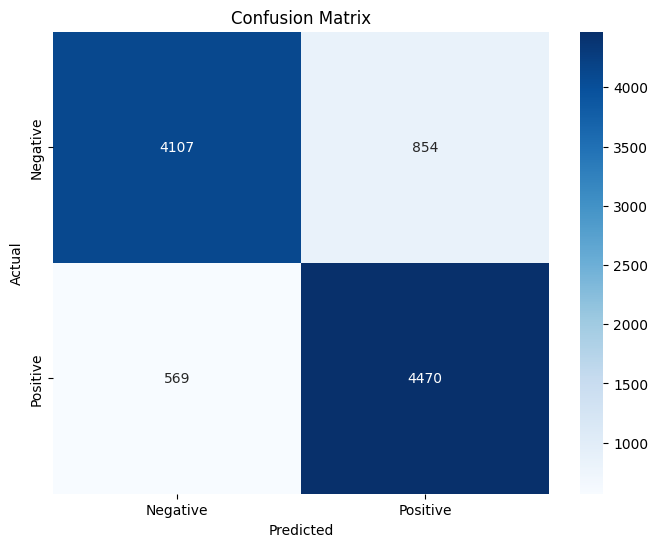

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

# Calculate confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Calculate precision, recall, and accuracy
precision = precision_score(test_labels, predicted_labels)
recall = recall_score(test_labels, predicted_labels)
accuracy = accuracy_score(test_labels, predicted_labels)

# Print precision, recall, and accuracy
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


## **2) Glove + transformer model**

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 79ms/step - accuracy: 0.5255 - loss: 0.7063 - val_accuracy: 0.6808 - val_loss: 0.6455 - learning_rate: 1.0000e-04
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.6190 - loss: 0.6510 - val_accuracy: 0.7434 - val_loss: 0.5475 - learning_rate: 1.0000e-04
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.7088 - loss: 0.5789 - val_accuracy: 0.7667 - val_loss: 0.4997 - learning_rate: 1.0000e-04
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.7540 - loss: 0.5247 - val_accuracy: 0.7870 - val_loss: 0.4656 - learning_rate: 1.0000e-04
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.7813 - loss: 0.4879 - val_accuracy: 0.7926 - val_loss: 0.4571 - learning_rate: 1.0000e-04
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.7882 - loss: 0.4678 - val_accuracy: 0.8138 - val_loss: 0.4248 - learning_rate: 1.0000e-04
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step -

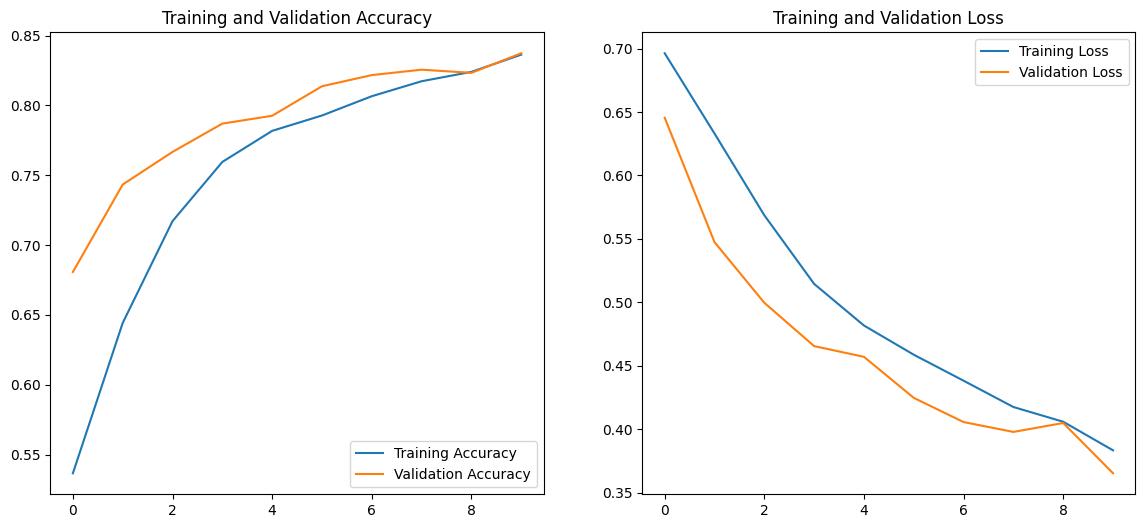

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7193 - loss: 0.5363
GloVe + Transformer Test Accuracy: 0.7223
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step
              precision    recall  f1-score   support

           0       0.97      0.46      0.62      4961
           1       0.65      0.98      0.78      5039

    accuracy                           0.72     10000
   macro avg       0.81      0.72      0.70     10000
weighted avg       0.81      0.72      0.70     10000



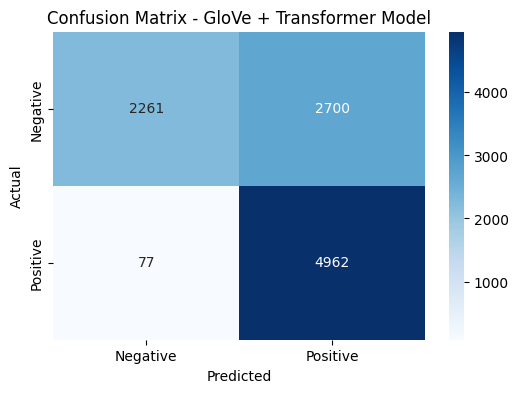

In [31]:
# Transformer Block
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [Dense(ff_dim, activation="relu"), Dense(embed_dim),]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# GloVe + Transformer Model
class GloveTransformerModel(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, embeddings_matrix, maxlen, num_heads, ff_dim):
        super(GloveTransformerModel, self).__init__()
        self.embedding = Embedding(vocab_size + 1, embedding_dim, weights=[embeddings_matrix], trainable=True)
        self.transformer_block = TransformerBlock(embed_dim=embedding_dim, num_heads=num_heads, ff_dim=ff_dim)
        self.global_pool = GlobalAveragePooling1D()
        self.dropout1 = Dropout(0.3)
        self.dense1 = Dense(64, activation="relu")
        self.dropout2 = Dropout(0.3)
        self.output_layer = Dense(1, activation="sigmoid")

    def call(self, inputs, training=False):  # Add training argument with default value
        x = self.embedding(inputs)
        x = self.transformer_block(x, training=training)  # Pass training argument
        x = self.global_pool(x)
        x = self.dropout1(x, training=training)  # Optionally pass training argument for dropout
        x = self.dense1(x)
        x = self.dropout2(x, training=training)  # Optionally pass training argument for dropout
        return self.output_layer(x)

# Compile and train the GloVe + Transformer model
glove_transformer_model = GloveTransformerModel(vocab_size=vocab_size, embedding_dim=embedding_dim,
                                                embeddings_matrix=embeddings_matrix, maxlen=500,
                                                num_heads=2, ff_dim=64)

glove_transformer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                                loss='binary_crossentropy', metrics=['accuracy'])

glove_transformer_history = glove_transformer_model.fit(train_dataset.shuffle(10000).batch(256),
                                                        epochs=10,
                                                        validation_data=validation_dataset.batch(256),
                                                        callbacks=[reduce_lr, model_checkpoint])

def plot_accuracy_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_accuracy_loss(glove_transformer_history)

glove_transformer_test_loss, glove_transformer_test_accuracy = glove_transformer_model.evaluate(test_dataset.batch(256))
print(f'GloVe + Transformer Test Accuracy: {glove_transformer_test_accuracy:.4f}')


glove_transformer_predictions = glove_transformer_model.predict(test_dataset.batch(256))
glove_transformer_predicted_labels = (glove_transformer_predictions > 0.5).astype(int).flatten()
print(classification_report(test_labels, glove_transformer_predicted_labels))


glove_transformer_conf_matrix = confusion_matrix(test_labels, glove_transformer_predicted_labels)
plt.figure(figsize=(6, 4))
sns.heatmap(glove_transformer_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - GloVe + Transformer Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


## **The Gated Recurrent Unit (GRU)**

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:681: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


125/125 ━━━━━━━━━━━━━━━━━━━━ 25s 96ms/step - accuracy: 0.5427 - loss: 0.6842 - val_accuracy: 0.7495 - val_loss: 0.5214 - learning_rate: 0.0010
Epoch 2/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.8065 - loss: 0.4361 - val_accuracy: 0.8543 - val_loss: 0.3389 - learning_rate: 0.0010
Epoch 3/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.8731 - loss: 0.3148 - val_accuracy: 0.8716 - val_loss: 0.3124 - learning_rate: 0.0010
Epoch 4/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.8924 - loss: 0.2756 - val_accuracy: 0.8826 - val_loss: 0.2873 - learning_rate: 0.0010
Epoch 5/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.9081 - loss: 0.2452 - val_accuracy: 0.8879 - val_loss: 0.2794 - learning_rate: 0.0010
Epoch 6/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9152 - loss: 0.2271 - val_accuracy: 0.8867 - val_loss: 0.2778 - learning_rate: 0.0010
Epoch 7/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9225 - loss: 0.2107

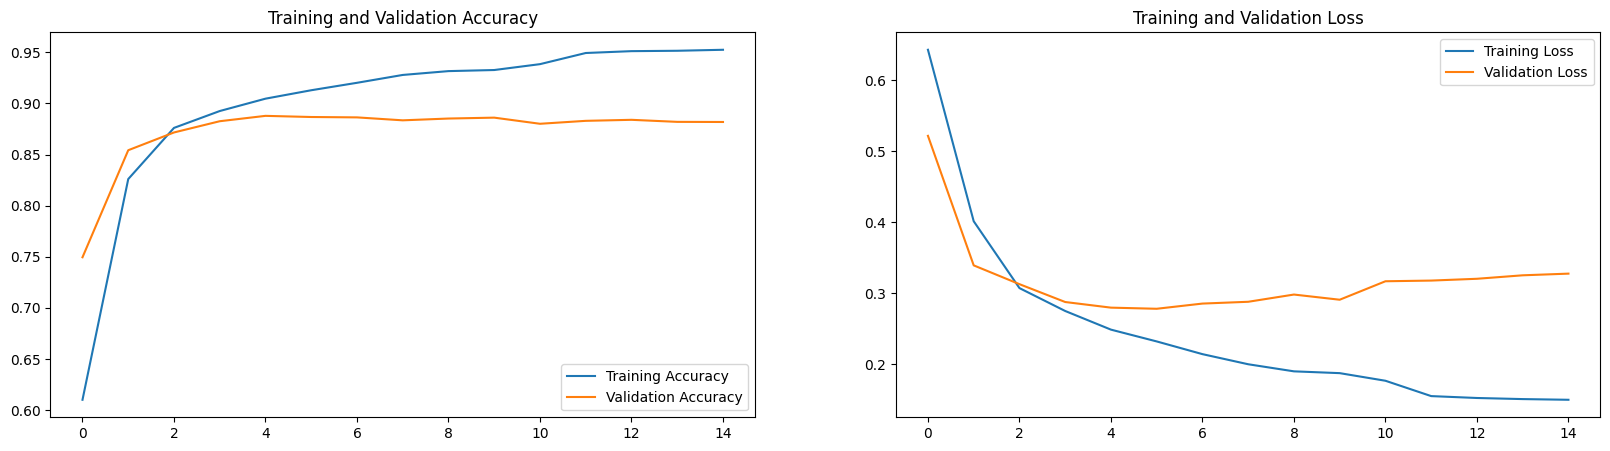

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9188 - loss: 0.2165
Train Accuracy: 0.9188
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8671 - loss: 0.3134
Test Accuracy: 0.8674


In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Our model definition using GRU
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, weights=[embeddings_matrix], trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(embedding_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(embedding_dim)),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, mode='min', verbose=1)
checkpoint_filepath = './model-best.keras'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', mode='max', save_best_only=True)


epochs_num = 15
history = model.fit(train_dataset.shuffle(10000).batch(256),
                    epochs=epochs_num,
                    validation_data=validation_dataset.batch(256),
                    callbacks=[reduce_lr, model_checkpoint]
                   )

def show_loss_accuracy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

show_loss_accuracy(history)


model.load_weights(checkpoint_filepath)


train_loss, train_accuracy = model.evaluate(train_dataset.batch(512))
print(f'Train Accuracy: {train_accuracy:.4f}')


test_loss, test_accuracy = model.evaluate(test_dataset.batch(512))
print(f'Test Accuracy: {test_accuracy:.4f}')


In [22]:
predictions = model.predict(test_padded)
predicted_labels = (predictions > 0.5).astype(int).flatten()
results_df = pd.DataFrame({
    'Review': test_sentences,
    'Actual Sentiment': test_labels,
    'Predicted Sentiment': predicted_labels
})

print(results_df.head())


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
                                                  Review  Actual Sentiment  \
33553  I really liked this Summerslam due to the look...                 1   
9427   Not many television shows appeal to quite as m...                 1   
199    The film quickly gets to a major chase scene w...                 0   
12447  Jane Austen would definitely approve of this o...                 1   
39489  Expectations were somewhat high for me when I ...                 0   

       Predicted Sentiment  
33553                    0  
9427                     1  
199                      0  
12447                    1  
39489                    0  


Precision: 0.8428
Recall: 0.9057
Accuracy: 0.8674


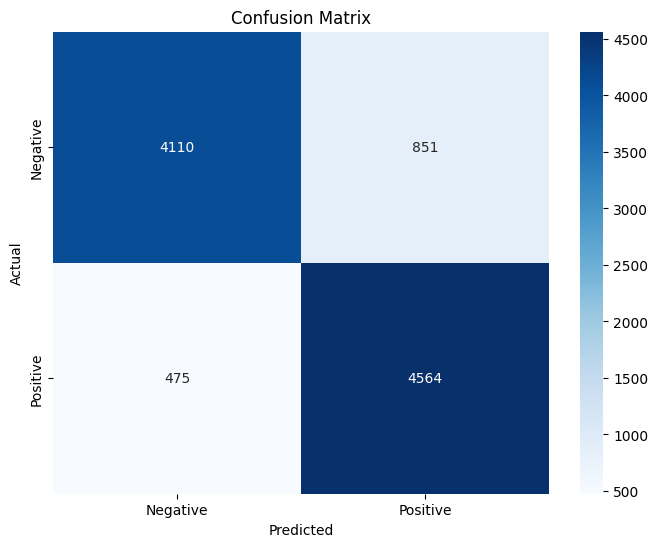

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

cm = confusion_matrix(test_labels, predicted_labels)

precision = precision_score(test_labels, predicted_labels)
recall = recall_score(test_labels, predicted_labels)
accuracy = accuracy_score(test_labels, predicted_labels)


print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


# **Conclusion**


In conclusion, Bidirectional LSTMs outperform GRU and GloVe + Transformer models for sentiment analysis on the IMDb dataset due to their superior ability to capture contextual relationships and long-term dependencies. Their design effectively mitigates issues like the vanishing gradient, making them robust in processing sequences typical of short text reviews. Conversely, GRUs struggle with long-range dependencies, while the complexity of GloVe + Transformers can lead to overfitting, especially on smaller datasets. Additionally, the sequential nature of the data aligns better with LSTM architecture. Overall, the effectiveness of a model often depends on its ability to match the characteristics of the dataset.